In [ ]:
import requests
import os

# download data & models for genre classification assignment
"""
I need:
training & test data
top two models
"""

# download data & models for image processing assignment
"""
I need:
block1 data
class labels
best performing model for Basic Modelling

best performing autoencoding model
"""
model_url = "https://raw.githubusercontent.com/username/repo_name/main/models_and_data/model_name.h5"
model_path = "model_name.h5"
response = requests.get(model_url)
with open(model_path, "wb") as f:
    f.write(response.content)

# Download test data
test_data_url = "https://raw.githubusercontent.com/username/repo_name/main/models_and_data/test_data.csv"
test_data_path = "test_data.csv"
response = requests.get(test_data_url)
with open(test_data_path, "wb") as f:
    f.write(response.content)

In [3]:
# imports
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
import requests
import zipfile
import os
import pickle

def load_pickle_from_url(url, pickle_file_name, extract_dir="extracted_files"):
    """
    Utility function to load and unzip pickle from URL - amalgamated code from multiple sources
    """
    try:
        # Step 1: Download the ZIP file
        zip_file_path = "temp_download.zip"
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        with open(zip_file_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {zip_file_path}")

        # Step 2: Unzip the downloaded file
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Extracted contents to {extract_dir}")

        # Step 3: Locate and load the pickle file
        pickle_file_path = os.path.join(extract_dir, pickle_file_name)
        if not os.path.exists(pickle_file_path):
            raise FileNotFoundError(f"Pickle file {pickle_file_name} not found in {extract_dir}")

        with open(pickle_file_path, 'rb') as f:
            data = pickle.load(f)

        print("Pickle file successfully loaded.")
        return data

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    finally:
        # Clean up temporary zip file
        if os.path.exists(zip_file_path):
            os.remove(zip_file_path)

In [47]:
url = "https://raw.githubusercontent.com/alanstears/colab/refs/heads/main/lyricsA.pkl.zip"
pickle_file_name = "lyricsA.pkl"

lyricsA = load_pickle_from_url(url, pickle_file_name)

url = "https://raw.githubusercontent.com/alanstears/colab/refs/heads/main/lyricsB.pkl.zip"
pickle_file_name = "lyricsB.pkl"

lyricsB = load_pickle_from_url(url, pickle_file_name)

url = "https://raw.githubusercontent.com/alanstears/colab/refs/heads/main/lyricsC.pkl.zip"
pickle_file_name = "lyricsC.pkl"

lyricsC = load_pickle_from_url(url, pickle_file_name)

url = "https://raw.githubusercontent.com/alanstears/colab/refs/heads/main/lyricsD.pkl.zip"
pickle_file_name = "lyricsD.pkl"

lyricsD = load_pickle_from_url(url, pickle_file_name)

Downloaded temp_download.zip
Extracted contents to extracted_files
Pickle file successfully loaded.
Downloaded temp_download.zip
Extracted contents to extracted_files
Pickle file successfully loaded.
Downloaded temp_download.zip
Extracted contents to extracted_files
Pickle file successfully loaded.
Downloaded temp_download.zip
Extracted contents to extracted_files
Pickle file successfully loaded.


In [48]:
X_test_padded = lyricsA['X_test_padded']
y_test = lyricsD['y_test']
artist_distribution = lyricsA['artist_distribution']
bin_df = lyricsA['bin_df']
genre_distro = lyricsA['genre_distro']
genre_encoder = lyricsA['genre_encoder']
lyrics_model1 = lyricsB['lyrics_model1']
lyrics_model2 = lyricsC['lyrics_model2']
tokeniser_lyrics = lyricsD['tokeniser_lyrics']

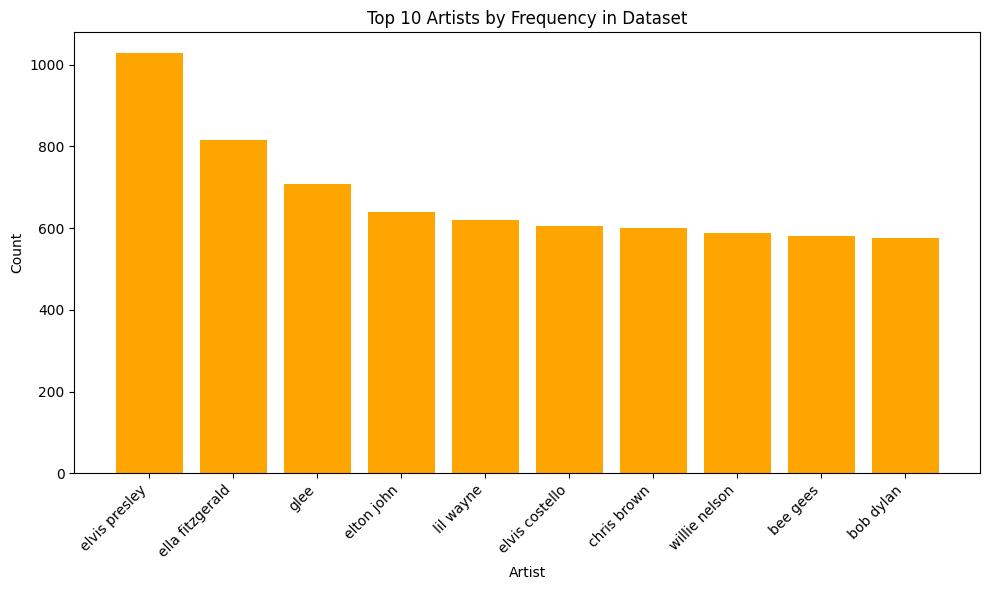

In [49]:
top_artists = artist_distribution.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_artists['Artist'], top_artists['Count'], color='orange')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Top 10 Artists by Frequency in Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

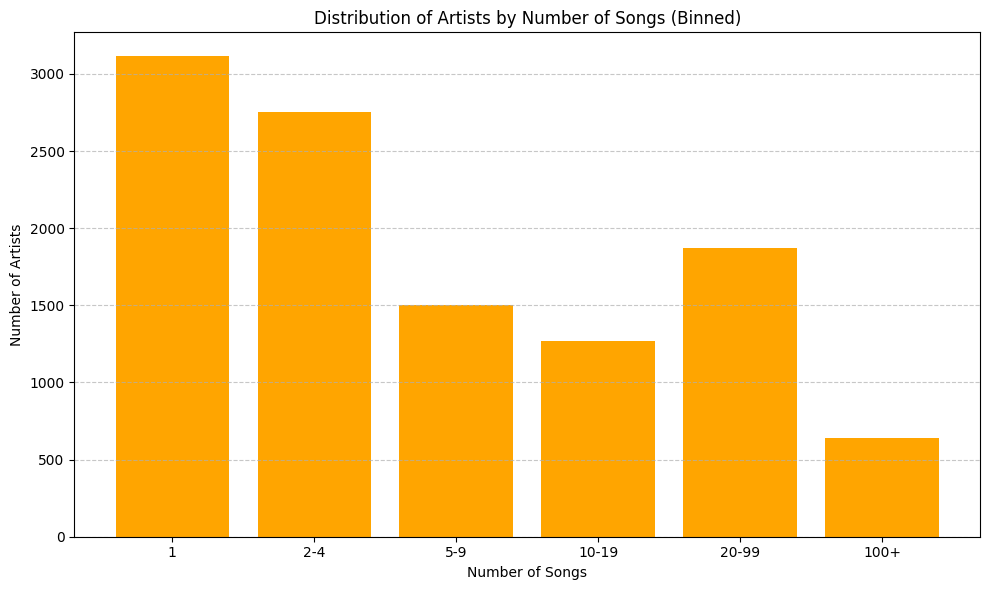

In [50]:
# Plot the binned distribution by artist
plt.figure(figsize=(10, 6))
plt.bar(bin_df['Songs'], bin_df['Artists'], color='orange')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Artists')
plt.title('Distribution of Artists by Number of Songs (Binned)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

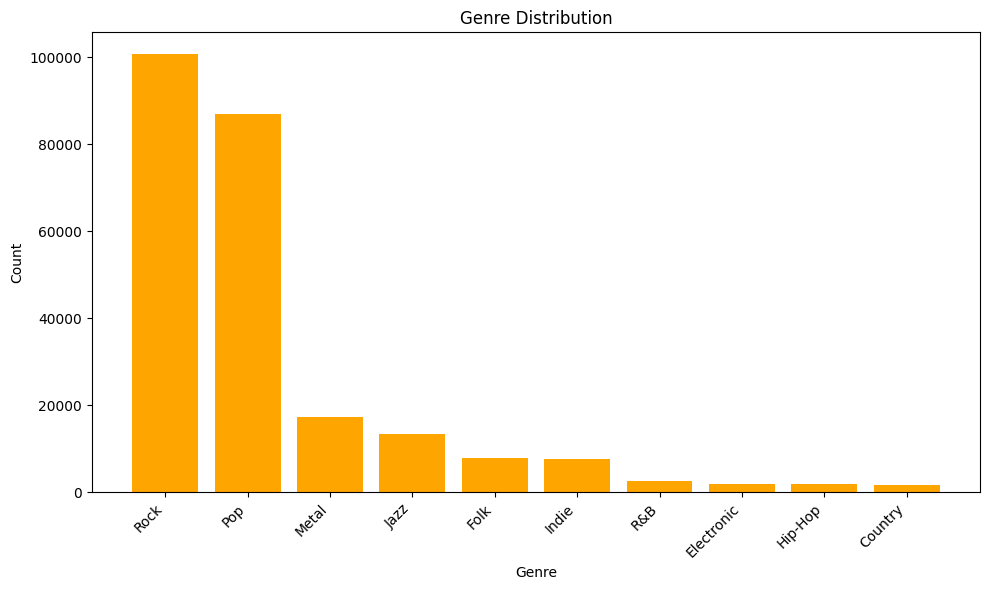

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(genre_distro['Genre'], genre_distro['Count'], color='orange')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

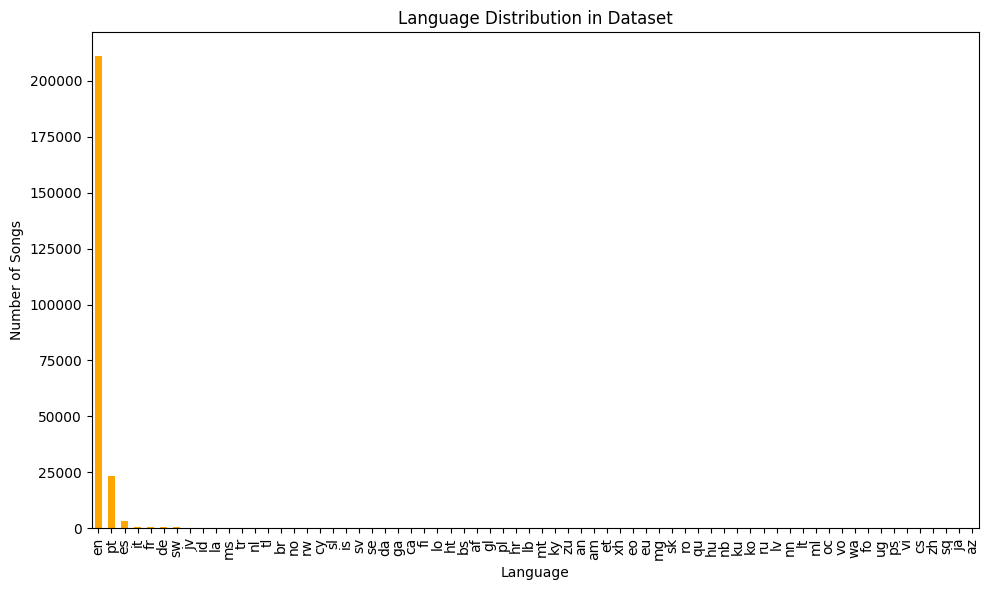

In [55]:
# Load the best model
best_model = lyrics_model1
best_model.summary()

print(best_model.loss)

# Evaluate the model on test data
loss, accuracy = best_model.evaluate(X_test_padded, y_test, batch_size=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 96)             │         960,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 96)             │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 96)             │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 96)                  │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,549,920 (13.54 MB)

 Trainable params: 1,183,306 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,366,614 (9.03 MB)

sparse_categorical_crossentropy
3968/3968 ━━━━━━━━━━━━━━━━━━━━ 121s 30ms/step - accuracy: 0.2930 - loss: 3.4686
Test Loss: 3.491539239883423
Test Accuracy: 0.2917454242706299


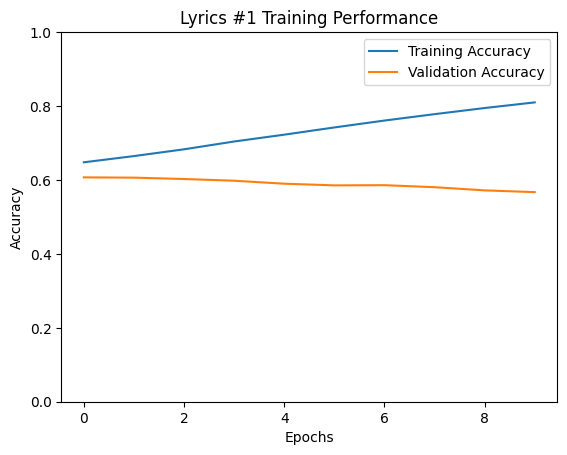

In [53]:
# Load the 2nd best model
best_model = lyrics_model2
best_model.summary()

print(best_model.loss)

# Evaluate the model on test data
loss, accuracy = best_model.evaluate(X_test_padded, y_test, batch_size=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009,824 (11.48 MB)

 Trainable params: 1,003,274 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,006,550 (7.65 MB)

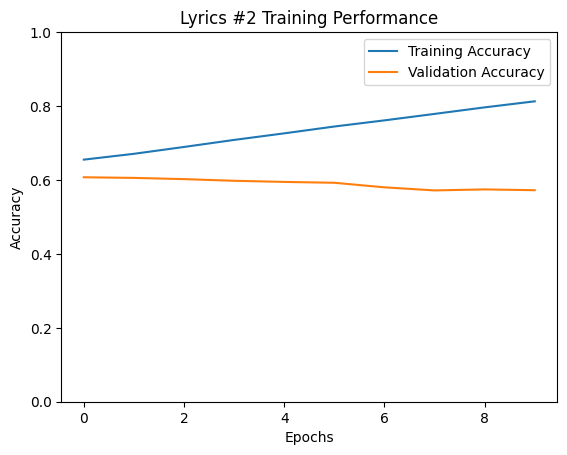

Best Hyperparameters (Lyrics): {'embedding_dim': 96, 'rnn_type': '3-LSTM', 'rnn_units': 96}

Second best Hyperparameters (Lyrics): {'embedding_dim': 64, 'rnn_type': '3-LSTM', 'rnn_units': 128}

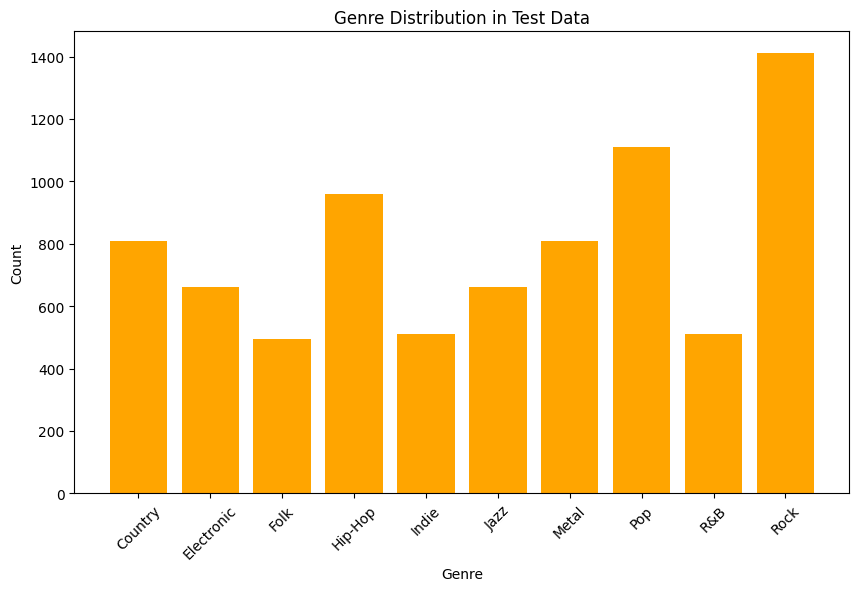

In [54]:
unique, counts = np.unique(y_test, return_counts=True)

# Use genre_encoder to get the genre names
genre_names = genre_encoder.inverse_transform(unique)

plt.figure(figsize=(10, 6))
plt.bar(genre_names, counts, color='orange')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution in Test Data')
plt.xticks(rotation=45)
plt.show()

# Image Processing

In [39]:
url = "https://raw.githubusercontent.com/alanstears/colab/refs/heads/main/img3.pkl.zip"
pickle_file_name = "img3.pkl"

img_data1 = load_pickle_from_url(url, pickle_file_name)

url = "https://raw.githubusercontent.com/alanstears/colab/refs/heads/main/img3_x_test.pkl.zip"
pickle_file_name = "img3_x_test.pkl"

img_data2 = load_pickle_from_url(url, pickle_file_name)

Downloaded temp_download.zip
Extracted contents to extracted_files
Pickle file successfully loaded.
Downloaded temp_download.zip
Extracted contents to extracted_files
Pickle file successfully loaded.


In [41]:
x_test = img_data2['x_test']
y_test = img_data1['y_test']
best_model = img_data1['best_model']
best_history = img_data1['best_history']
class_labels = img_data1['class_labels']
index_to_class_mapping = img_data1['index_to_class_mapping']

# Best Model for Classification

In [42]:
best_model.summary()
for layer in best_model.layers[1:]:
    print(layer.activation)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 649,688 (2.48 MB)

 Trainable params: 216,562 (845.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 433,126 (1.65 MB)

<function relu at 0x7cdc61c53ac0>
<function relu at 0x7cdc61c53ac0>
<function relu at 0x7cdc61c53ac0>
<function relu at 0x7cdc61c53ac0>
<function relu at 0x7cdc61c53ac0>
<function softmax at 0x7cdbddbfd090>


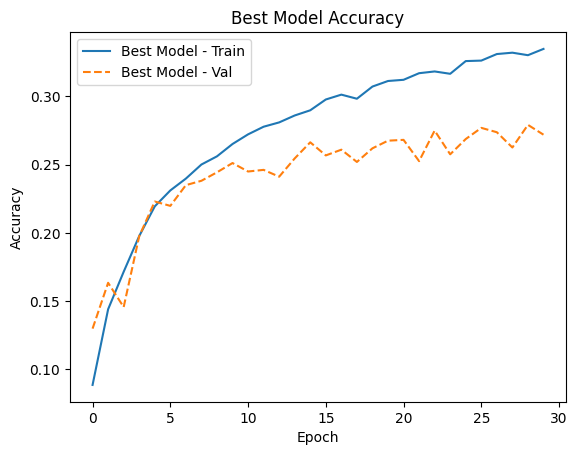

In [43]:
plt.plot(best_history['accuracy'], label=f'Best Model - Train')
plt.plot(best_history['val_accuracy'], linestyle='dashed', label=f'Best Model - Val')

plt.title('Best Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

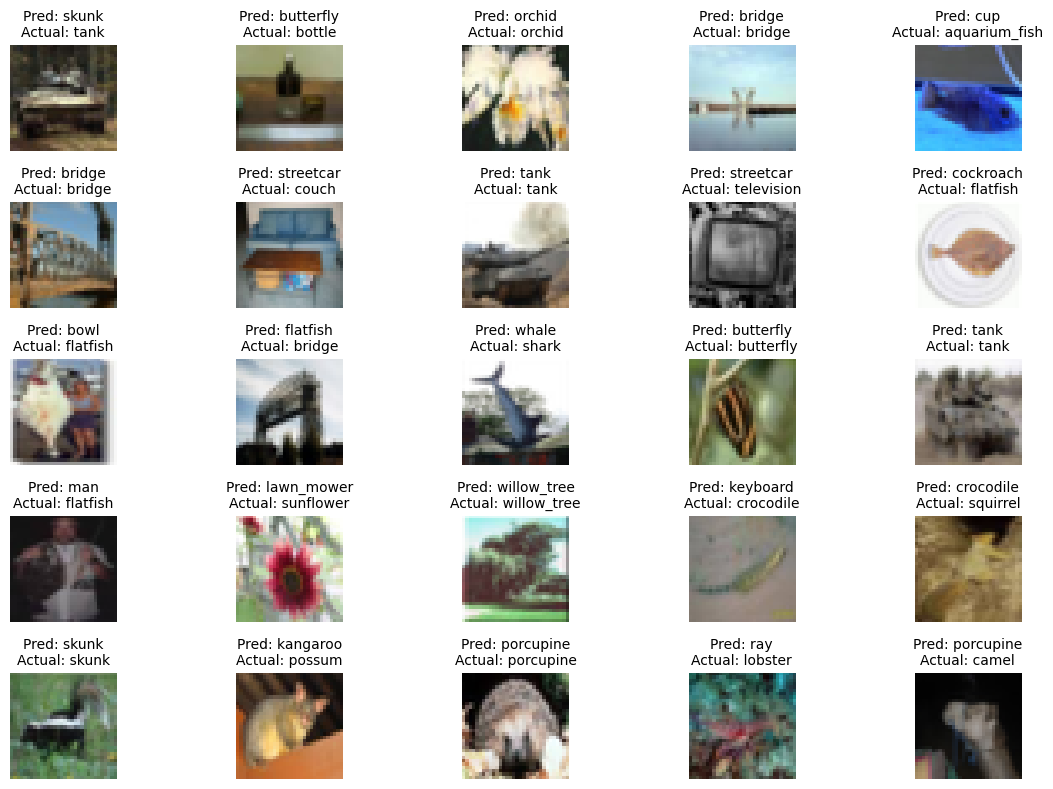

In [46]:
# test 25 random images
random_indices = random.sample(range(len(x_test)), 25)
images = []
predicted_labels = []
expected_labels = []

for i, idx in enumerate(random_indices):
    test_image = x_test[idx]
    images.append(test_image)
    test_label = y_test[idx]

    test_images = np.expand_dims(test_image, axis=0)

    # get predicted class label
    predicted_index = np.argmax(best_model.predict(test_images, verbose=0))
    predicted_labels.append(class_labels[index_to_class_mapping[predicted_index]])

    # get expected label
    expected_index = np.argmax(test_label)
    expected_labels.append(class_labels[index_to_class_mapping[expected_index]])

plt.figure(figsize=(12, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {expected_labels[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


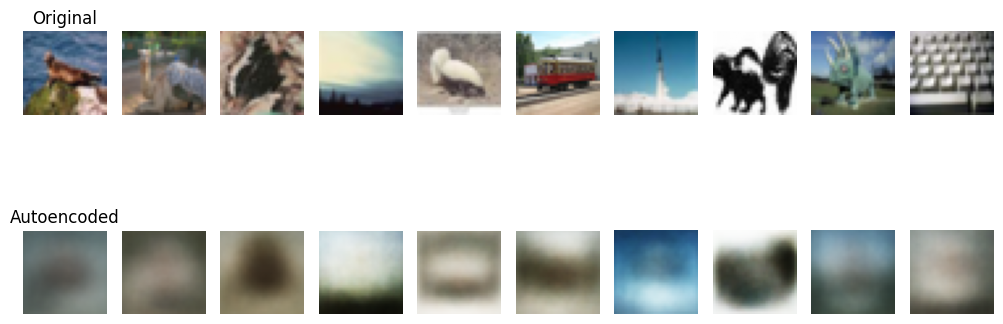

In [45]:
# reconstruct 10 test images
best_autoencoder = img_data1['best_autoencoder']
reconstructed_images = best_autoencoder.predict(x_test[:10])

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    if i == 0:
        plt.title("Original")

    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i])
    plt.axis('off')
    if i == 0:
        plt.title("Autoencoded")

plt.tight_layout()
plt.show()